# Step-by-step demonstration

## Lib Imports and configurations

In [1]:
# %matplotlib notebook
# %matplotlib inline 
%load_ext autoreload
%autoreload 2

import sys
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

sys.path.append("Codes/")
import TMPD_utils
import TMPD_class

import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
# pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
pd.options.display.float_format = '{:.4f}'.format


## Loading event log

In [2]:
# Mapping all event_logs paths
logs_path = glob.glob("Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs/*/*k.*")

# Removing the logs with 2500 events (based on Maaradji paper)
logs_path = [x for x in logs_path if "2.5" not in x]

# Showing mapped paths
print("How many logs? ", len(logs_path))
pd.DataFrame(logs_path)

How many logs?  54


,0
0,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cb\cb10k.mxml
1,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cb\cb5k.mxml
2,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cb\cb7.5k.mxml
3,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cd\cd10k.mxml
4,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cd\cd5k.MXML
5,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cd\cd7.5k.MXML
6,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cf\cf10k.mxml
7,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cf\cf5k.mxml
8,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cf\cf7.5k.mxml
9,Input/Synthetic/Business Process Drift - (Maaradji - Fast)/logs\cm\cm10k.mxml


<!-- ![Alt text](../Images/Concept_drift_firstcycle_steps_eng.png "General steps") -->

In [3]:
# Loading first event log
log_path = logs_path[1]
event_log = TMPD_utils.parse_mxml(log_path)

# This is a specifc step for this event log that separates in different rows the start and end of an activity. As we will only use one timestamp, we are filtering only the row representing the end of an activity.  
event_log = event_log[event_log.EventType == "complete"]

# Save original event index
event_log = event_log.reset_index(names='original_index') 

# Create an id based on the order of the event in the raw event log
event_log["Event_order_id"] = event_log.index

# This is a specifc step for this event log, because it have duplicated case ids. So we create a new case id.
event_log["Trace_order"] = TMPD_utils.cumulative_counting(event_log["TraceId"])

# Showing loaded event log
event_log.head(15)

,original_index,TraceId,WorkflowModelElement,EventType,Timestamp,Originator,Activity,Event_order_id,Trace_order
0,1,b1_113,Loan__application_received,complete,2004-02-11T09:30:00.000+00:00,NaN,Loan__application_received,0,0
1,3,b1_113,Check__application__form_completeness,complete,2004-02-11T09:55:28.917+00:00,NaN,Check__application__form_completeness,1,0
2,6,b1_113,Appraise_property,complete,2004-02-11T09:58:18.693+00:00,NaN,Appraise_property,2,0
3,7,b1_113,Check_credit_history,complete,2004-02-11T10:12:06.935+00:00,NaN,Check_credit_history,3,0
4,9,b1_113,Assess_loan_risk,complete,2004-02-11T11:22:58.531+00:00,NaN,Assess_loan_risk,4,0
5,11,b1_113,Assess_eligibility,complete,2004-02-11T11:30:07.055+00:00,NaN,Assess_eligibility,5,0
6,13,b1_113,Reject_application,complete,2004-02-11T11:36:39.125+00:00,NaN,Reject_application,6,0
7,15,b1_113,Loan_application_rejected,complete,2004-02-11T11:36:39.125+00:00,NaN,Loan_application_rejected,7,0
8,17,b1_12,Loan__application_received,complete,2004-02-02T15:00:00.000+00:00,NaN,Loan__application_received,8,1
9,19,b1_12,Check__application__form_completeness,complete,2004-02-02T15:13:41.152+00:00,NaN,Check__application__form_completeness,9,1


## Step 1 - Instantiating class and setting event log

In [7]:
# Iniatializing the TMPD_class
TMPD_instance = TMPD_class.TMPD(scenario='offline')

# Setting the transition log
TMPD_instance.set_transition_log(event_log, case_id='Trace_order', activity_key='Activity', timestamp_key='Timestamp', other_columns_keys=[])

# Executing the transition log
TMPD_instance.run_transition_log()

# Showing the transition log created
TMPD_instance.get_transition_log().head(15)

,original_index,case_id,activity_from,timestamp_from,activity_to,timestamp_to,transition_id,case_order
0,0,0,Loan__application_received,2004-02-11T09:30:00.000+00:00,Check__application__form_completeness,2004-02-11T09:55:28.917+00:00,0,0
1,1,0,Check__application__form_completeness,2004-02-11T09:55:28.917+00:00,Appraise_property,2004-02-11T09:58:18.693+00:00,1,1
2,2,0,Appraise_property,2004-02-11T09:58:18.693+00:00,Check_credit_history,2004-02-11T10:12:06.935+00:00,2,2
3,3,0,Check_credit_history,2004-02-11T10:12:06.935+00:00,Assess_loan_risk,2004-02-11T11:22:58.531+00:00,3,3
4,4,0,Assess_loan_risk,2004-02-11T11:22:58.531+00:00,Assess_eligibility,2004-02-11T11:30:07.055+00:00,4,4
5,5,0,Assess_eligibility,2004-02-11T11:30:07.055+00:00,Reject_application,2004-02-11T11:36:39.125+00:00,5,5
6,6,0,Reject_application,2004-02-11T11:36:39.125+00:00,Loan_application_rejected,2004-02-11T11:36:39.125+00:00,6,6
7,8,1,Loan__application_received,2004-02-02T15:00:00.000+00:00,Check__application__form_completeness,2004-02-02T15:13:41.152+00:00,7,0
8,9,1,Check__application__form_completeness,2004-02-02T15:13:41.152+00:00,Check_credit_history,2004-02-02T15:16:23.615+00:00,8,1
9,10,1,Check_credit_history,2004-02-02T15:16:23.615+00:00,Assess_loan_risk,2004-02-02T15:25:12.650+00:00,9,2


## Step 2 - Setting Window Strategy

In [5]:
# Setting the window strategy parameters
TMPD_instance.set_windowing_strategy(window_size_mode = 'Fixed', window_size = 4000, window_ref_mode = 'Fixed', overlap = True, sliding_step = 200, continuous = True)

# Executing the window strategy indexation
TMPD_instance.run_windowing_strategy()

# Showing the windows indexes
dict(list(TMPD_instance.get_windowing_strategy().items())[:15])

{0: {'start': 0, 'end': 4000, 'window_index': 0},
 1: {'start': 200, 'end': 4200, 'window_index': 1},
 2: {'start': 400, 'end': 4400, 'window_index': 2},
 3: {'start': 600, 'end': 4600, 'window_index': 3},
 4: {'start': 800, 'end': 4800, 'window_index': 4},
 5: {'start': 1000, 'end': 5000, 'window_index': 5},
 6: {'start': 1200, 'end': 5200, 'window_index': 6},
 7: {'start': 1400, 'end': 5400, 'window_index': 7},
 8: {'start': 1600, 'end': 5600, 'window_index': 8},
 9: {'start': 1800, 'end': 5800, 'window_index': 9},
 10: {'start': 2000, 'end': 6000, 'window_index': 10},
 11: {'start': 2200, 'end': 6200, 'window_index': 11},
 12: {'start': 2400, 'end': 6400, 'window_index': 12},
 13: {'start': 2600, 'end': 6600, 'window_index': 13},
 14: {'start': 2800, 'end': 6800, 'window_index': 14}}

## Step 3 - Setting Process Representation (using Transition Matrix)

In [9]:
# Setting the Transition Matrix (TM) process representation
TMPD_instance.set_process_representation(threshold_anomaly=0
                                    , control_flow_features=['frequency', 'probability', 'causality', 'parallel', 'choice']
                                    , time_features={'average_time':'timestamp', 'time_std':'timestamp'}
                                    , resource_features={}
                                    , data_features={})

# Executing the process_representation using all dataset just for an example
TMPD_instance.run_process_representation(TMPD_instance.transition_log)

# Showing the process representation created
TMPD_instance.get_process_representation().head(15)

frequency  \
activity_from     activity_to                                             
Appraise_property Appraise_property                                   0   
                  Approve_application                                 0   
                  Assess_eligibility                               1219   
                  Assess_loan_risk                                 1286   
                  Cancel_application                                  0   
                  Check__application__form_completeness               0   
                  Check_credit_history                             2495   
                  Check_if_home_insurance_quote_is_requested          0   
                  Loan__application_approved                          0   
                  Loan__application_canceled                          0   
                  Loan_application_rejected                           0   
                  Prepare_acceptance_pack                             0   
                  Receive_updated_application                         0   
                  Reject_application                                  0   
                  Return_application_back_to_applicant                0   

                                                              probability  \
activity_from     activity_to                                               
Appraise_property Appraise_property                                0.0000   
                  Approve_application                              0.0000   
                  Assess_eligibility                               0.2438   
                  Assess_loan_risk                                 0.2572   
                  Cancel_application                               0.0000   
                  Check__application__form_completeness            0.0000   
                  Check_credit_history                             0.4990   
                  Check_if_home_insurance_quote_is_requested       0.0000   
                  Loan__application_approved                       0.0000   
                  Loan__application_canceled                       0.0000   
                  Loan_application_rejected                        0.0000   
                  Prepare_acceptance_pack                          0.0000   
                  Receive_updated_application                      0.0000   
                  Reject_application                               0.0000   
                  Return_application_back_to_applicant             0.0000   

                                                              causality  \
activity_from     activity_to                                             
Appraise_property Appraise_property                                   0   
                  Approve_application                                 0   
                  Assess_eligibility                                  1   
                  Assess_loan_risk                                    0   
                  Cancel_application                                  0   
                  Check__application__form_completeness               0   
                  Check_credit_history                                0   
                  Check_if_home_insurance_quote_is_requested          0   
                  Loan__application_approved                          0   
                  Loan__application_canceled                          0   
                  Loan_application_rejected                           0   
                  Prepare_acceptance_pack                             0   
                  Receive_updated_application                         0   
                  Reject_application                                  0   
                  Return_application_back_to_applicant                0   

                                                              parallel  \
activity_from     activity_to                                            
Appraise_property Appraise_property                 

## Step 4 - Setting Change Representation

In [17]:
# Defining the change features
change_features_strategy_dict = {
    'delta_matrix_strategy': 
        {
            'frequency_delta' : {'process_feature':'frequency', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'probability_delta' : {'process_feature':'probability', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'frequency_delta_percentage' : {'process_feature':'frequency', 'method':'percentage'}
            , 'prob_freq_delta_weight' : {'process_feature':'probability', 'method':'aggregation_weight', 'agg_function' : 'sum', 'weight_feature' : 'frequency'}
        }
    , 'statistic_test_strategy' : 
        {
            'frequency_gtest_pvalue' : {'process_feature':'frequency', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            , 'frequency_cramersv' : {'process_feature':'frequency', 'method':'cramers_v', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
        }
    }

# Setting Change Representation
TMPD_instance.set_change_representation(change_features_strategy_dict)

# Executing the Change Representation using the window strategy
TMPD_instance.run_change_representation()

# Showing the Change Representation created
TMPD_instance.get_change_representation().head(15)

,start,end,window_index,reference_window_index,frequency_delta,probability_delta,frequency_delta_percentage,prob_freq_delta_weight,frequency_gtest_pvalue,frequency_cramersv
0,0,4000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200,4200,1,0,28.0000,0.0582,0.0035,0.1672,1.0000,0.0000
2,400,4400,2,0,108.0000,0.2088,0.0135,1.2082,1.0000,0.0000
3,600,4600,3,0,116.0000,0.1794,0.0145,1.2087,1.0000,0.0000
4,800,4800,4,0,76.0000,0.1338,0.0095,0.5693,1.0000,0.0000
5,1000,5000,5,0,148.0000,0.1794,0.0185,1.4018,1.0000,0.0000
6,1200,5200,6,0,216.0000,0.2474,0.0270,2.9281,0.9578,0.0000
7,1400,5400,7,0,294.0000,0.3781,0.0367,5.4688,0.3449,0.0166
8,1600,5600,8,0,334.0000,0.4222,0.0418,7.3270,0.0763,0.0363
9,1800,5800,9,0,414.0000,0.4737,0.0517,10.8955,0.0011,0.0580


## Step 5 - Setting Detection Task

In [8]:
# Defining detection strategies
detection_task_strategy_dict = {
    'time_series_strategy': 
    {
        'cpd_frequency_delta' : {'change_features':['frequency_delta'], 'method':'cpd_pelt', 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1', 'smooth' : '3'}
        , 'cpd_prob_freq_delta' : {'change_features':['prob_freq_delta_weight'], 'method':'cpd_pelt', 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1', 'smooth' : '3'}
    }
    , 'threshold_strategy' : 
    {
        'gtest_frequency' : {'change_features':['frequency_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' : '3'}
        , 'fixed_frequency_delta_percentage' : {'change_features':['frequency_delta_percentage'], 'method':'comparison_operator', 'operator' : 'ge', 'threshold_value' : '0.05', 'smooth' : '3'}
    }
}

# Setting Detection Task
TMPD_instance.set_detection_task(detection_task_strategy_dict)

# Executing the Detection Task
TMPD_instance.run_detection_task()

# Showing Detection Task Results
TMPD_instance.get_detection_task()


,detection_strategy,detection_feature,detection_results
0,time_series_strategy,cpd_frequency_delta,"[26, 63, 94, 124, 162, 193, 235, 261, 301, 320]"
1,time_series_strategy,cpd_prob_freq_delta,"[28, 57, 96, 122, 163, 192, 235, 260, 303, 320]"
2,threshold_strategy,gtest_frequency,"[22, 62, 88, 129, 155, 198, 227, 266, 296, 320]"
3,threshold_strategy,fixed_frequency_delta_percentage,"[25, 63, 92, 126, 158, 194, 231, 261, 300, 320]"


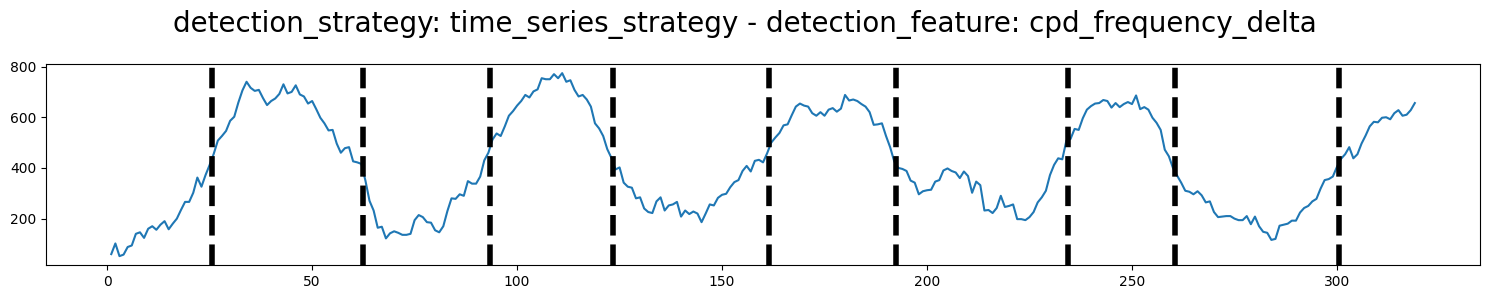

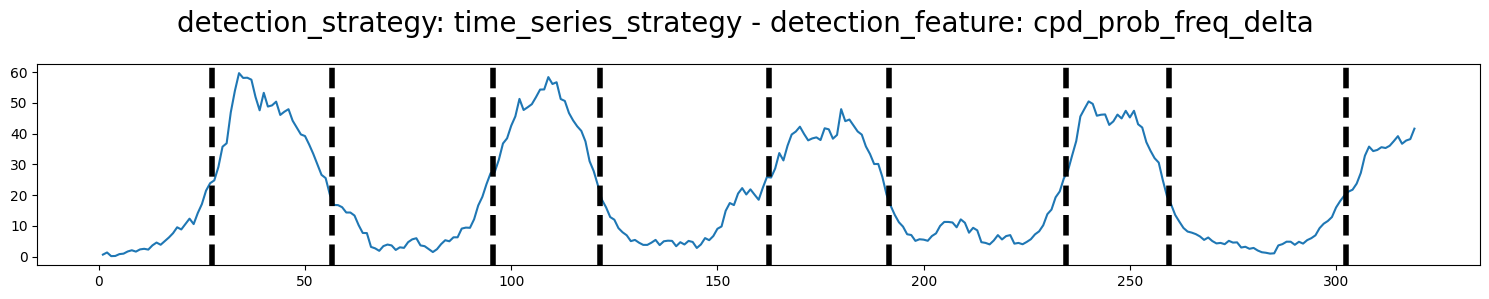

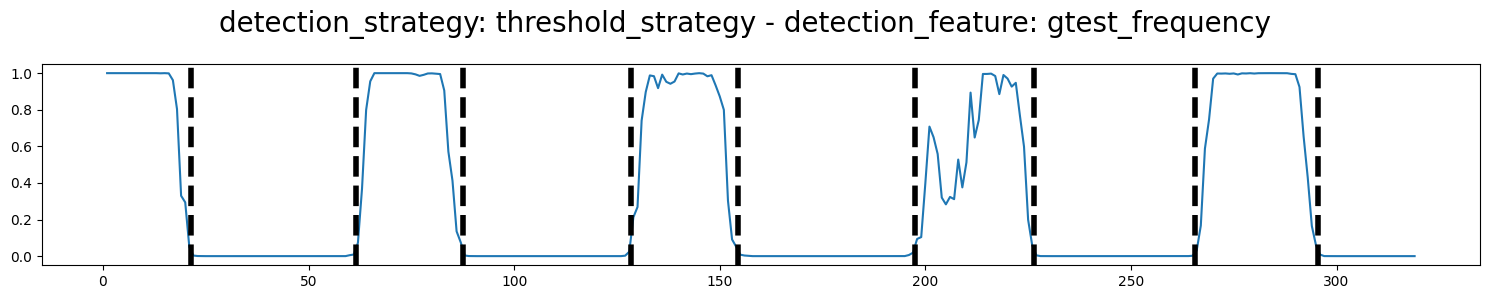

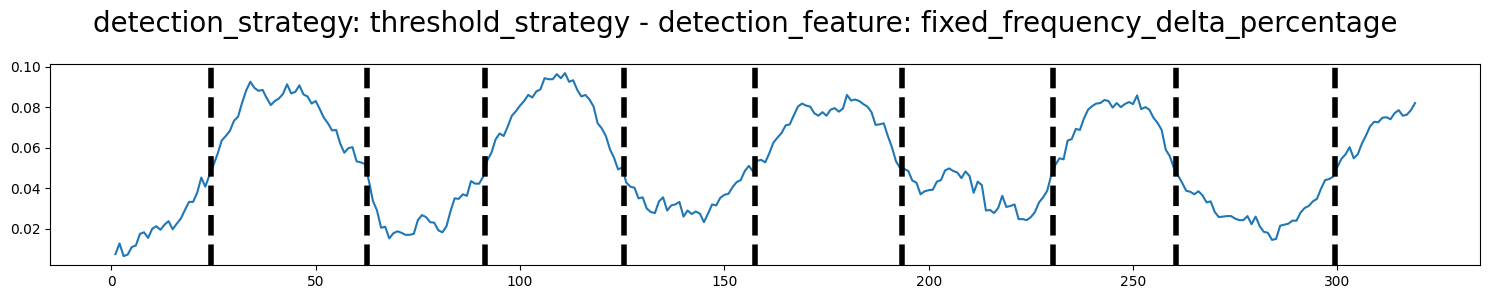

In [9]:
# Display Detection Task Results 
for result in TMPD_instance.get_detection_task().itertuples():
    fig, axarr = rpt.display(signal = TMPD_instance.get_change_representation()[TMPD_instance.detection_task_strategy_dict[result.detection_strategy][result.detection_feature]['change_features']]
                , true_chg_pts=[]
                , computed_chg_pts = result.detection_results
                , computed_chg_pts_color = "k"
                , computed_chg_pts_linewidth = 4
                , computed_chg_pts_linestyle = "--"
                , computed_chg_pts_alpha = 1
                , figsize=(15, 3)
                )
    plt.suptitle("detection_strategy: " + result.detection_strategy + " - detection_feature: " + result.detection_feature , fontsize=20)
    plt.subplots_adjust(top=0.8)
    plt.show()

## Step 6a - Setting Localization Task

In [10]:
# TODO

## Step 6b - Setting Characterization Task

In [11]:
# TODO

## Step 6c - Setting Explanation Task

In [12]:
# TODO